In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [51]:
col = ['s_length', 's_width', 'p_length', 'p_width', 'class'] 
#S_length = sepal length, S_width = sepal width, p_length = petal length, p_width =petal width

In [52]:
ds = pd.read_csv('iris.data', names=col)
#reading dataset as ds

In [53]:
ds.head()

,s_length,s_width,p_length,p_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
ds.shape

(150, 5)

In [43]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_length  150 non-null    float64
 1   S_width   150 non-null    float64
 2   P_length  150 non-null    float64
 3   P_width   150 non-null    float64
 4   Class     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
ds.describe()

,S_length,S_width,P_length,P_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
ds['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

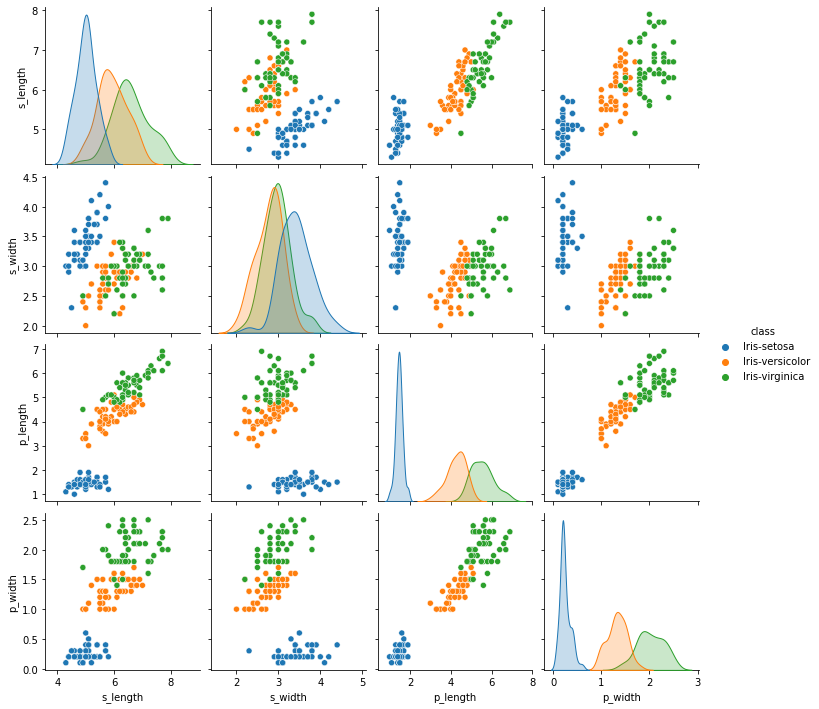

In [55]:
h=sns.pairplot(ds, hue='class')

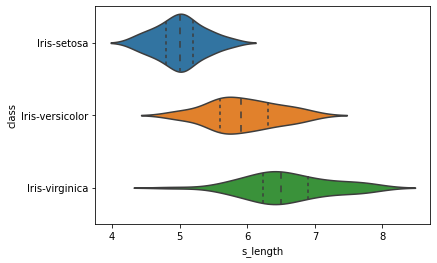

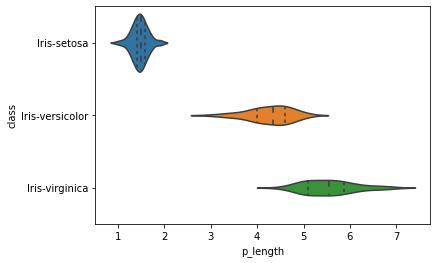

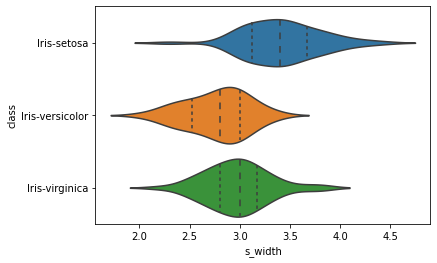

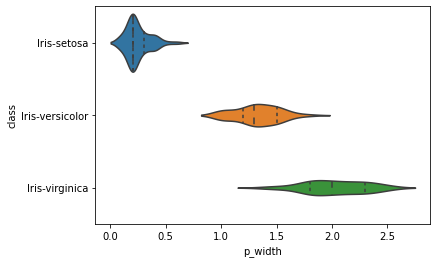

In [57]:
g = sns.violinplot(y='class', x='s_length', data=ds, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='p_length', data=ds, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='s_width', data=ds, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='p_width', data=ds, inner='quartile')
plt.show()



In [18]:
data = ds.values
X = data[:,0:4]
Y = data[:,4]

In [19]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

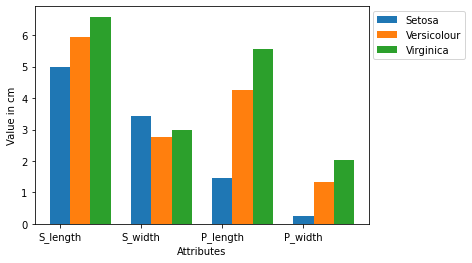

In [25]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Attributes")
plt.ylabel("Value in cm")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [59]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [60]:
predictions = svn.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [63]:
X_new = np.array([[ 7.1,3.0,5.9,2.1 ], [ 6.0,2.9,4.5,1.5 ], [4.7,3.2,1.6,0.2]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa']


In [64]:
import pickle
with open('SVM.pickle', 'wb') as i:
    pickle.dump(svn, i)

In [65]:
with open('SVM.pickle', 'rb') as i:
    model = pickle.load(i)

In [66]:
model.predict(X_new)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)